# Computation speed

In this notebook, we tested the average computation speed for various models in different cases.
___

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from specs_utils import get_specs

get_specs()

Spec,Value
Machine,x86_64
Platform,Linux-5.4.0-58-generic-x86_64-with-glibc2.29
Architecture,"(64bit, ELF)"
Cores,Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
Number of cores,8
Python version,3.8.5


In [3]:
def test_model(Model, n):

    init_time = list()
    encode_time = list()
    decode_time = list()
    total_time = list()

    # Iterations for computing mean and standard deviation
    iterations = 50

    for i in range(1, iterations + 1):
        # Initialization
        start_process = time.time()
        model = Model(n, 1)
        # Encoding
        start_encode = time.time()
        for dim in range(model.n):
            model.encode(0.5, dim)
        # Decoding
        start_decode = time.time()
        result = model.decode()
        end_process = time.time()

        # Store timings
        init_time.append(start_encode - start_process)
        encode_time.append(start_decode - start_encode)
        decode_time.append(end_process - start_decode)
        total_time.append(end_process - start_process)

    return [
        n,
        np.mean(init_time),
        np.mean(encode_time),
        np.mean(decode_time),
        np.mean(total_time),
        np.std(total_time),
    ]


def plot_results(df, title="Model"):
    """Plot all the results"""

    # Total timewith STD
    fig = plt.figure(figsize=(15, 6), dpi=150)

    df.plot(
        x="n",
        y=[4],
        yerr="Total STD",
        uplims=True,
        lolims=True,
        kind="line",
        color="r",
        ax=plt.gca(),
    )
    plt.title(f"{title} - Total time with STD")

    plt.grid(b=True, which="major", linestyle="-")
    plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    plt.show()

    # Timings insight
    fig = plt.figure(figsize=(15, 6), dpi=150)

    df.plot(x="n", y=[1, 2, 3, 4], kind="line", ax=plt.gca())
    plt.title(f"{title} - Timings insight")

    plt.grid(b=True, which="major", linestyle="-")
    plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    plt.show()

    # Zooming in
    print("Zooming in:")
    fig = plt.figure(figsize=(15, 6), dpi=150)

    df.plot(x="n", y=[1, 2], kind="line", ax=plt.subplot(1, 2, 1))
    plt.title("Initialization and encoding only")

    plt.grid(b=True, which="major", linestyle="-")
    plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    ax = plt.subplot(1, 2, 2)
    df[1:19].plot(x="n", y=[1, 2, 3], kind="line", ax=ax)
    df[1:19].plot(x="n", y=[4], yerr="Total STD", kind="line", ax=ax)
    plt.title("Showing results for n < 20")

    plt.grid(b=True, which="major", linestyle="-")
    plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
    plt.minorticks_on()

    plt.show()

___
## AngularModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [4]:
from qrobot.models import AngularModel

max_n = 26

In [5]:
table = list()

for n in range(1, max_n + 1):
    print(f"Testing n={n}", end="\r")
    table.append(test_model(AngularModel, n))
print("             ")

df_angular = pd.DataFrame(
    table, columns=["n", "Initialization", "Encode", "Decode", "Total", "Total STD"]
)

Plotting the results:

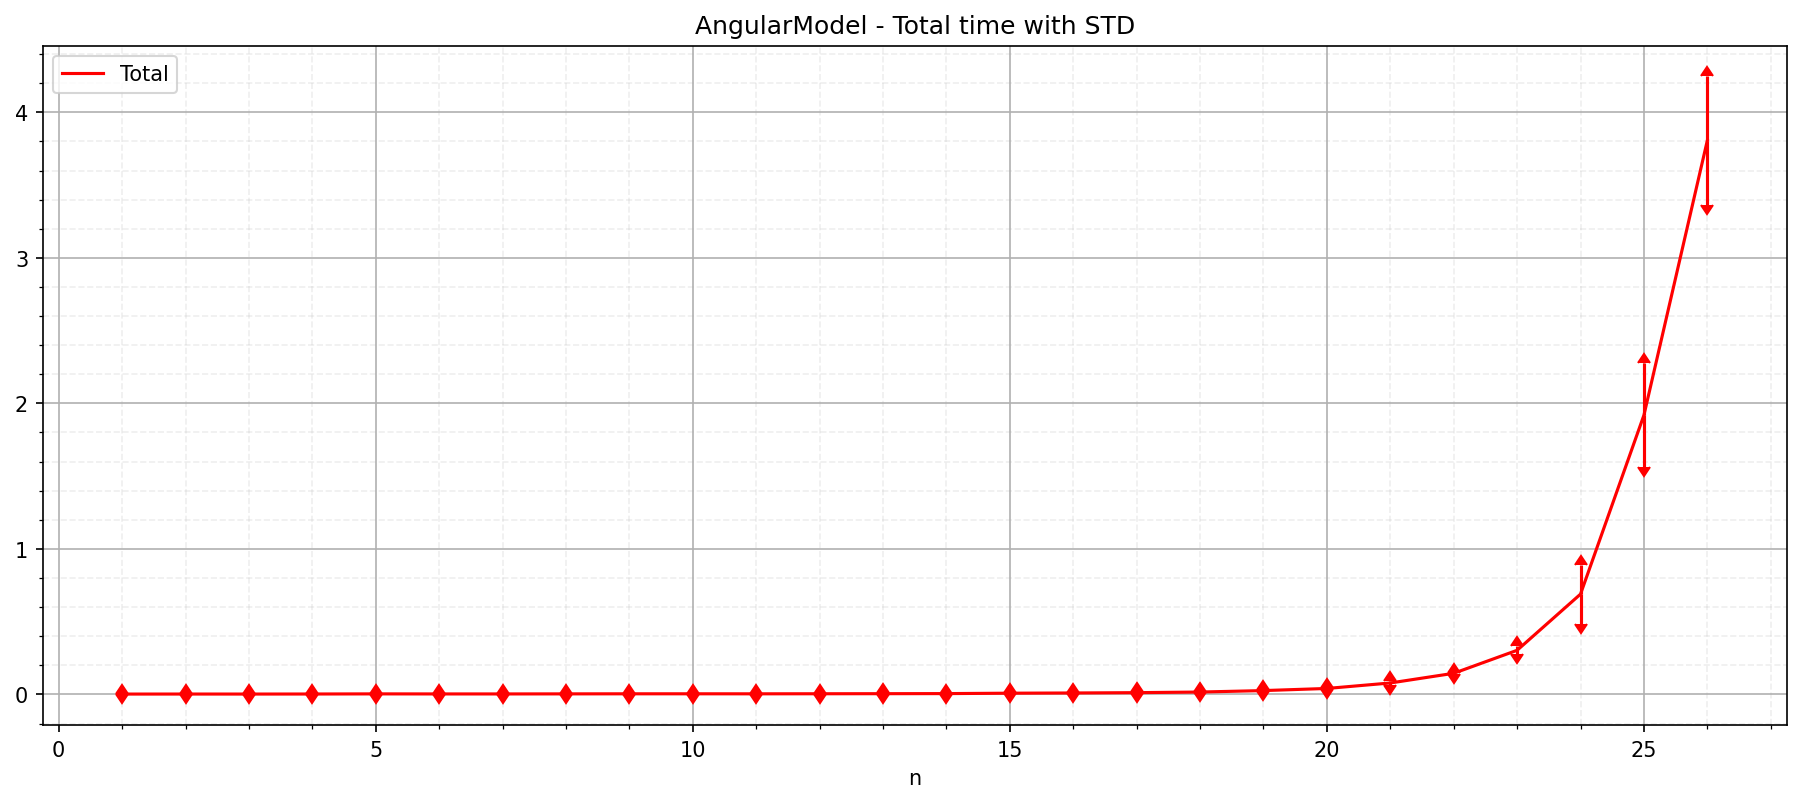

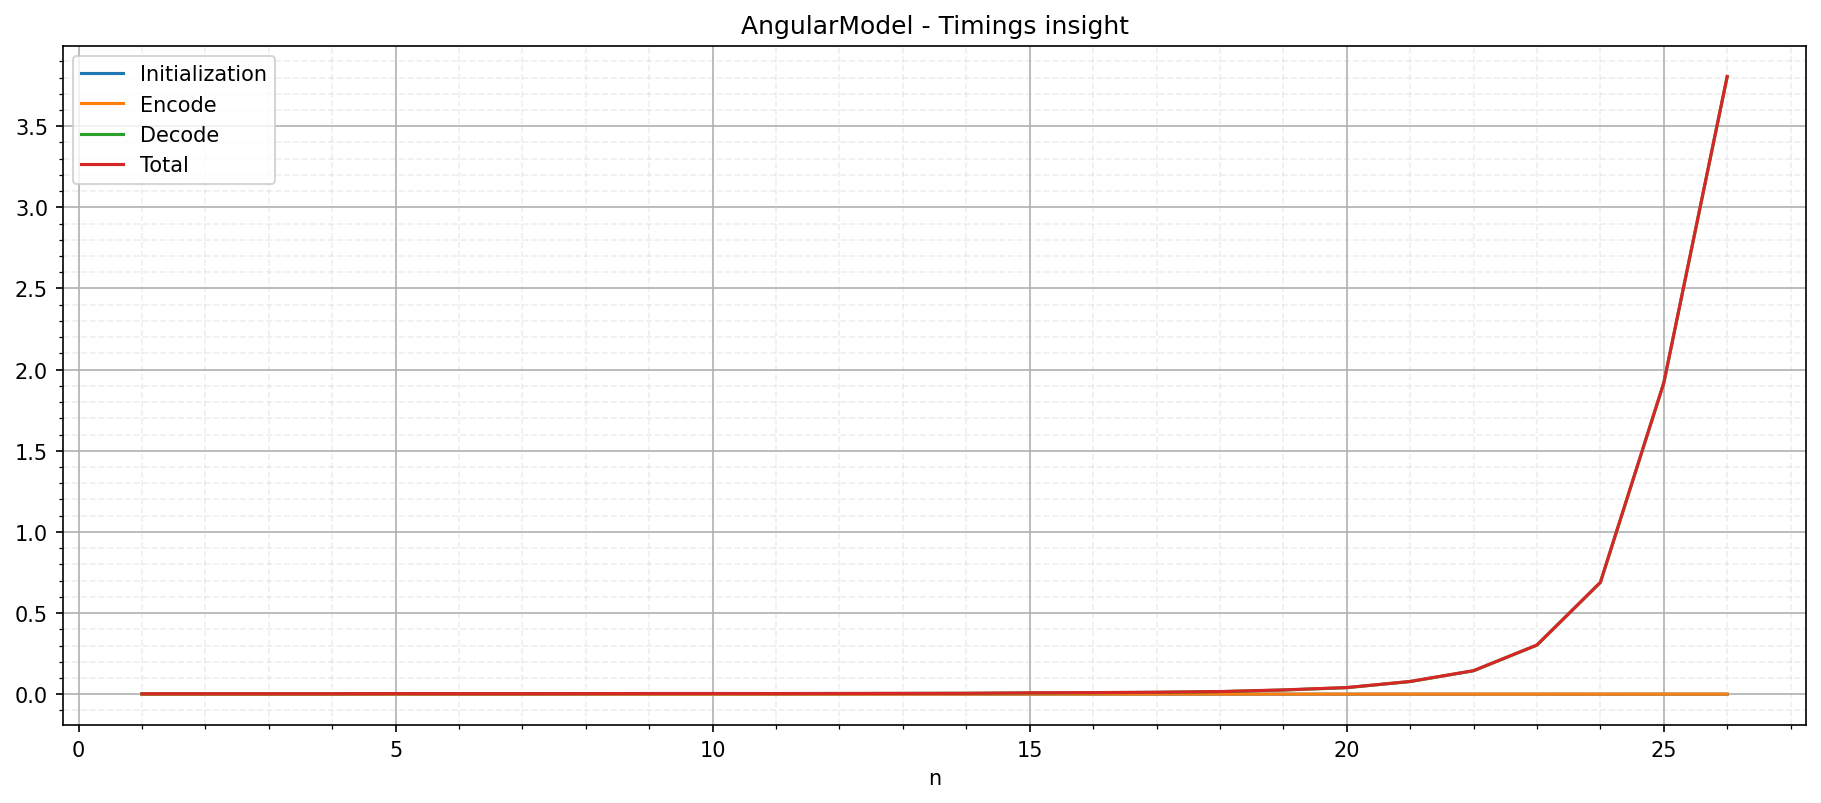

Zooming in:


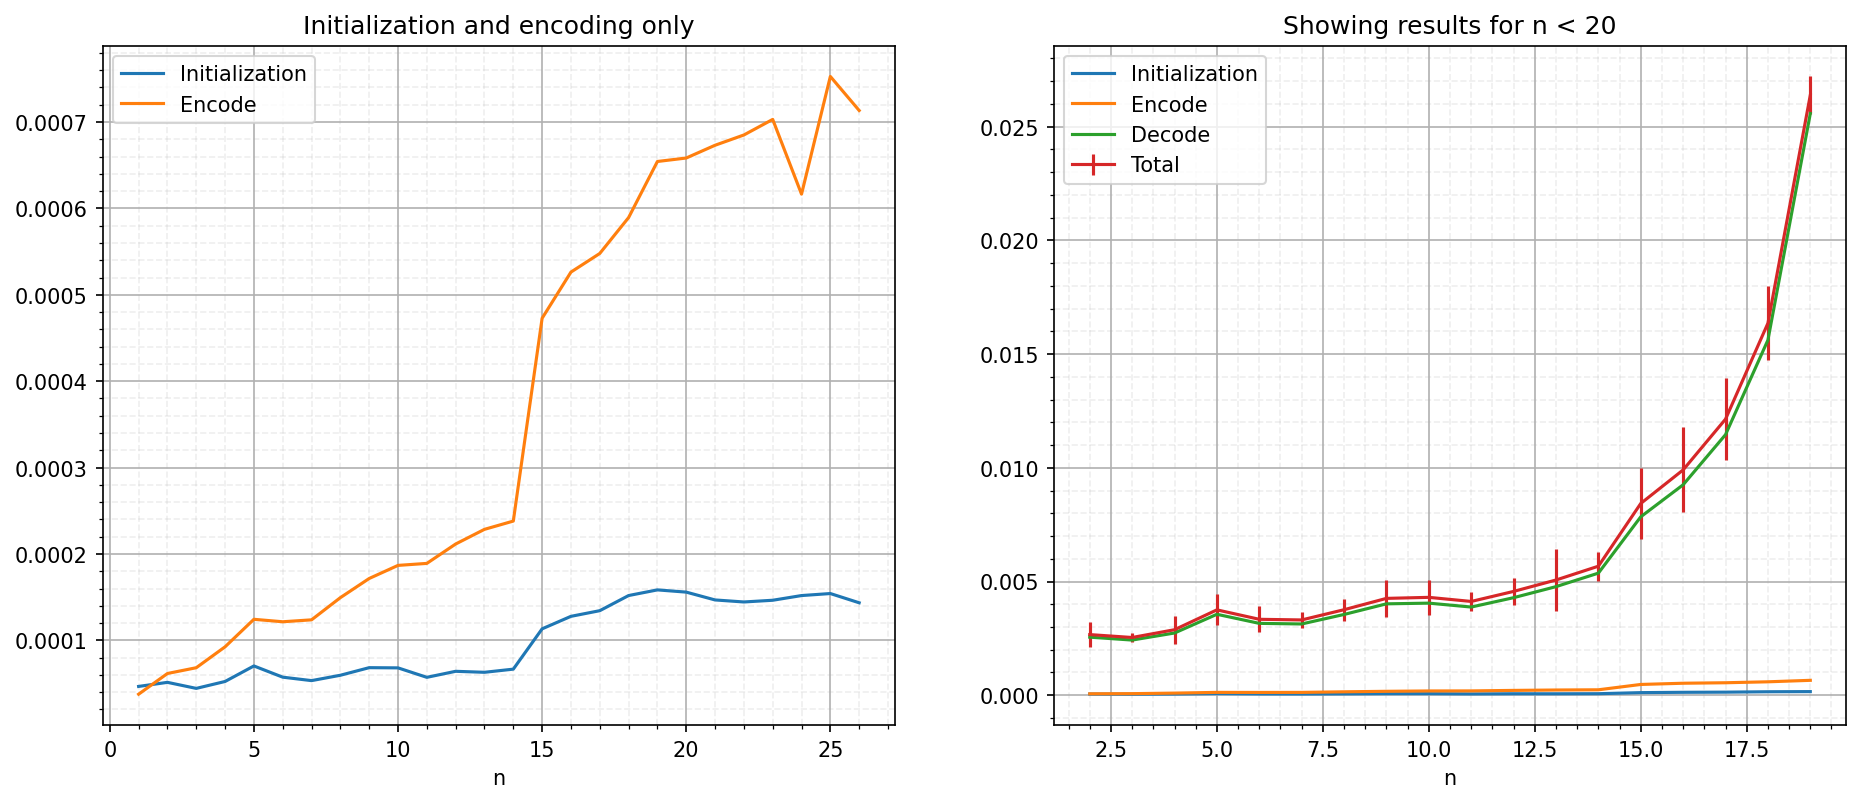

In [6]:
plot_results(df_angular, "AngularModel")

Numerical values:

In [7]:
df_angular

,n,Initialization,Encode,Decode,Total,Total STD
0,1,0.000047,0.000038,0.002363,0.002447,0.000890
1,2,0.000051,0.000062,0.002552,0.002665,0.000554
2,3,0.000044,0.000068,0.002425,0.002538,0.000185
3,4,0.000052,0.000093,0.002735,0.002880,0.000618
4,5,0.000070,0.000124,0.003559,0.003753,0.000678
5,6,0.000057,0.000122,0.003159,0.003338,0.000570
6,7,0.000053,0.000124,0.003133,0.003310,0.000354
7,8,0.000060,0.000149,0.003551,0.003760,0.000480
8,9,0.000068,0.000172,0.004018,0.004258,0.000812
9,10,0.000068,0.000187,0.004049,0.004303,0.000764


___
## LinearModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [8]:
from qrobot.models import LinearModel

max_n = 26

In [9]:
table = list()

for n in range(1, max_n + 1):
    print(f"Testing n={n}", end="\r")
    table.append(test_model(LinearModel, n))
print("             ")


df_linear = pd.DataFrame(
    table, columns=["n", "Initialization", "Encode", "Decode", "Total", "Total STD"]
)

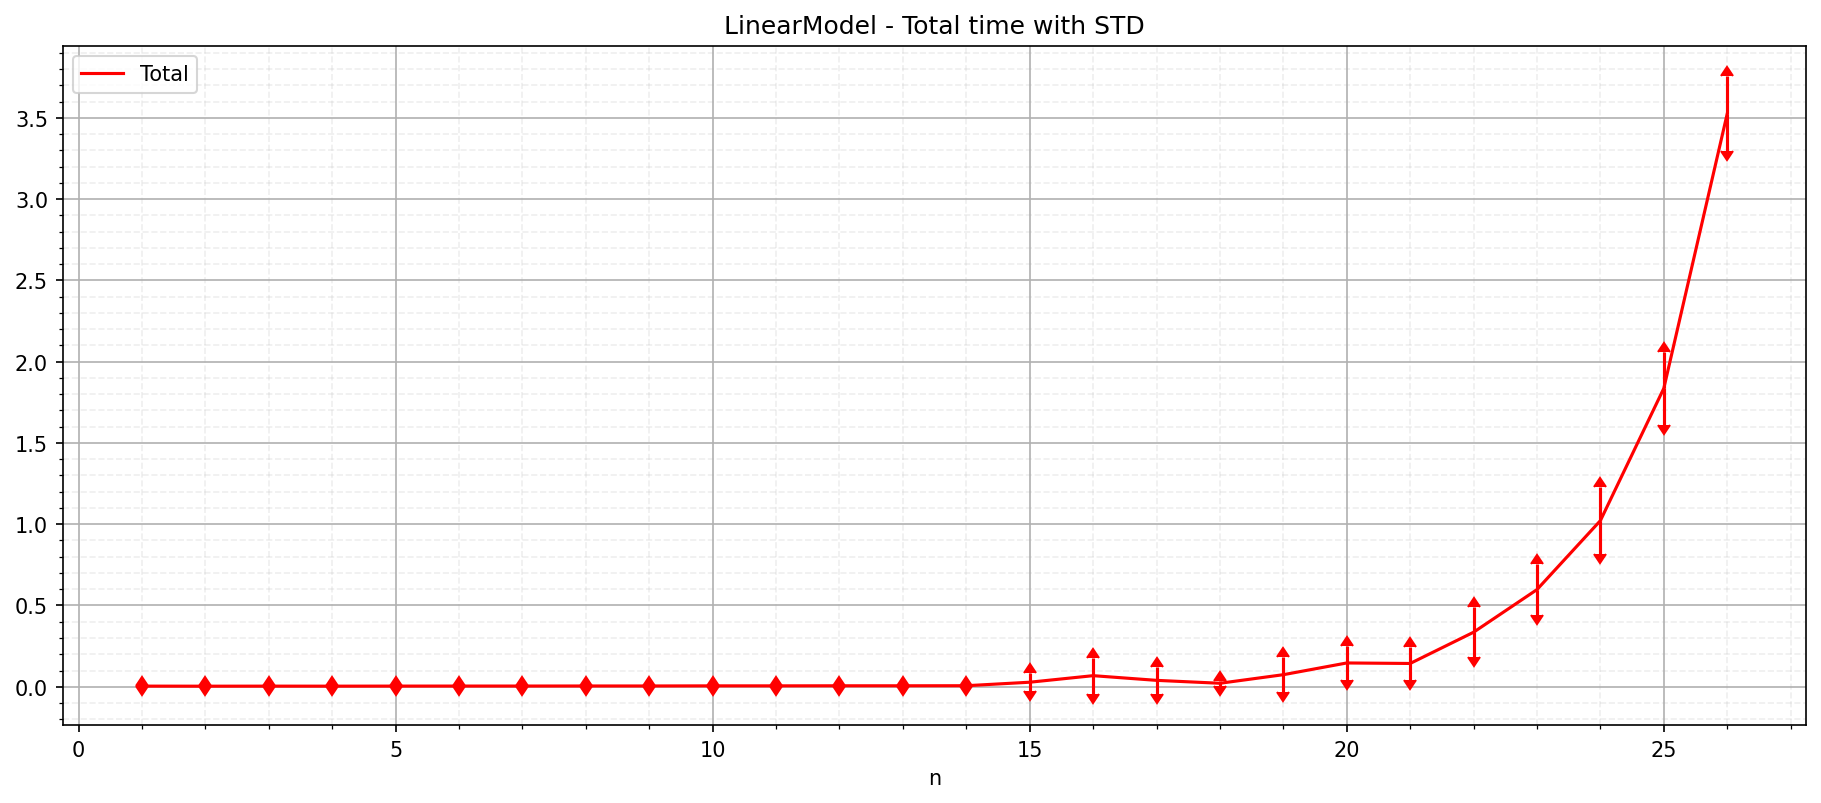

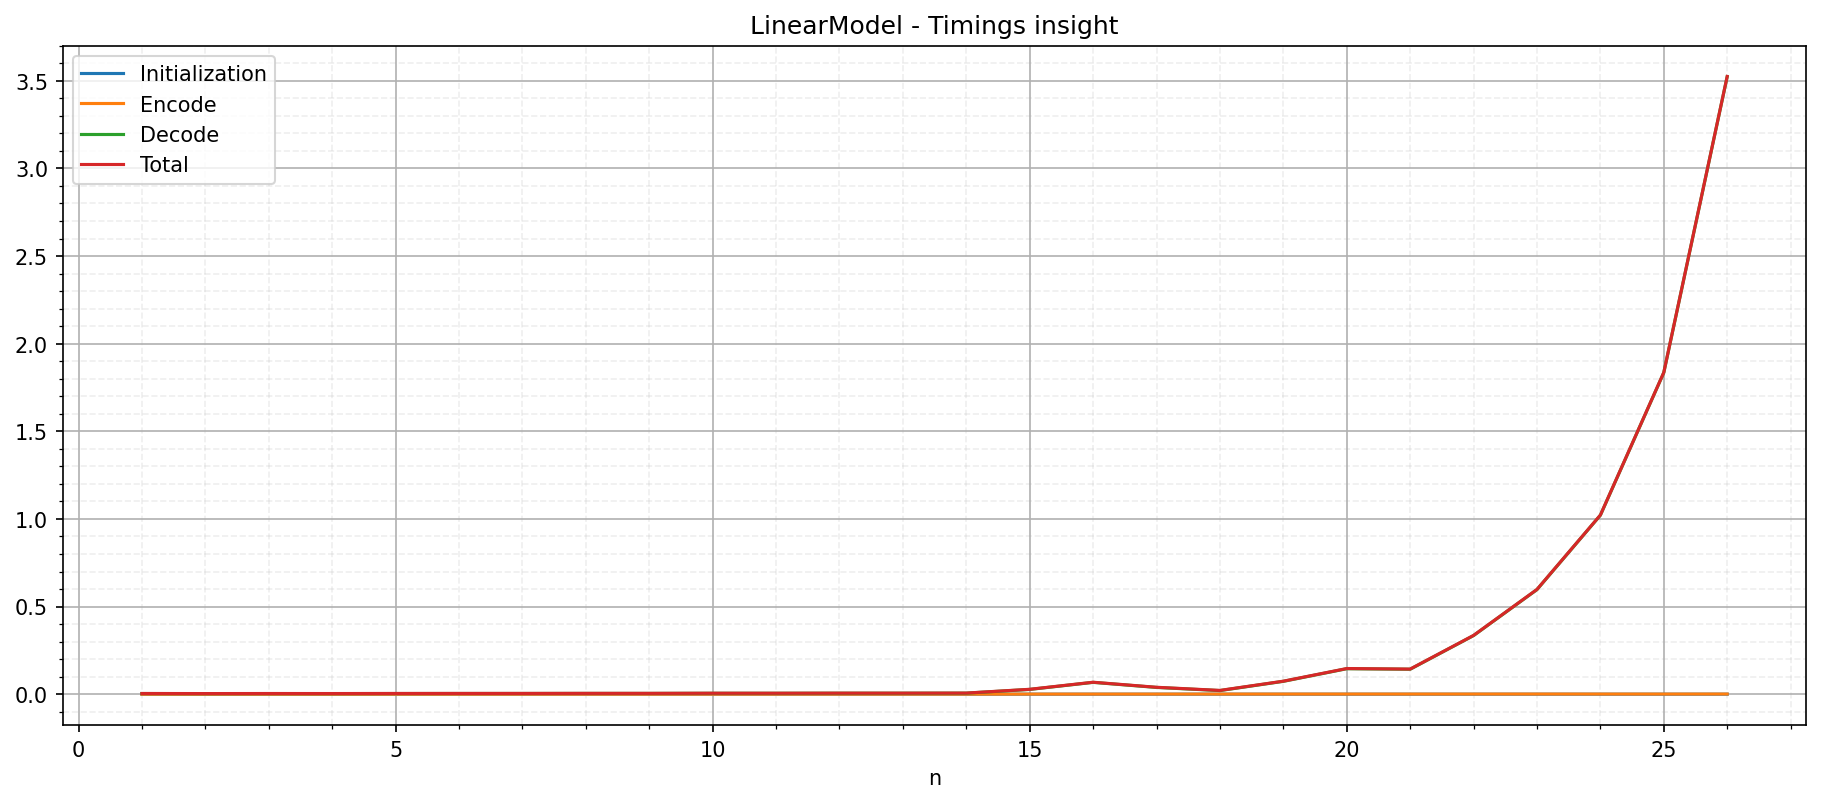

Zooming in:


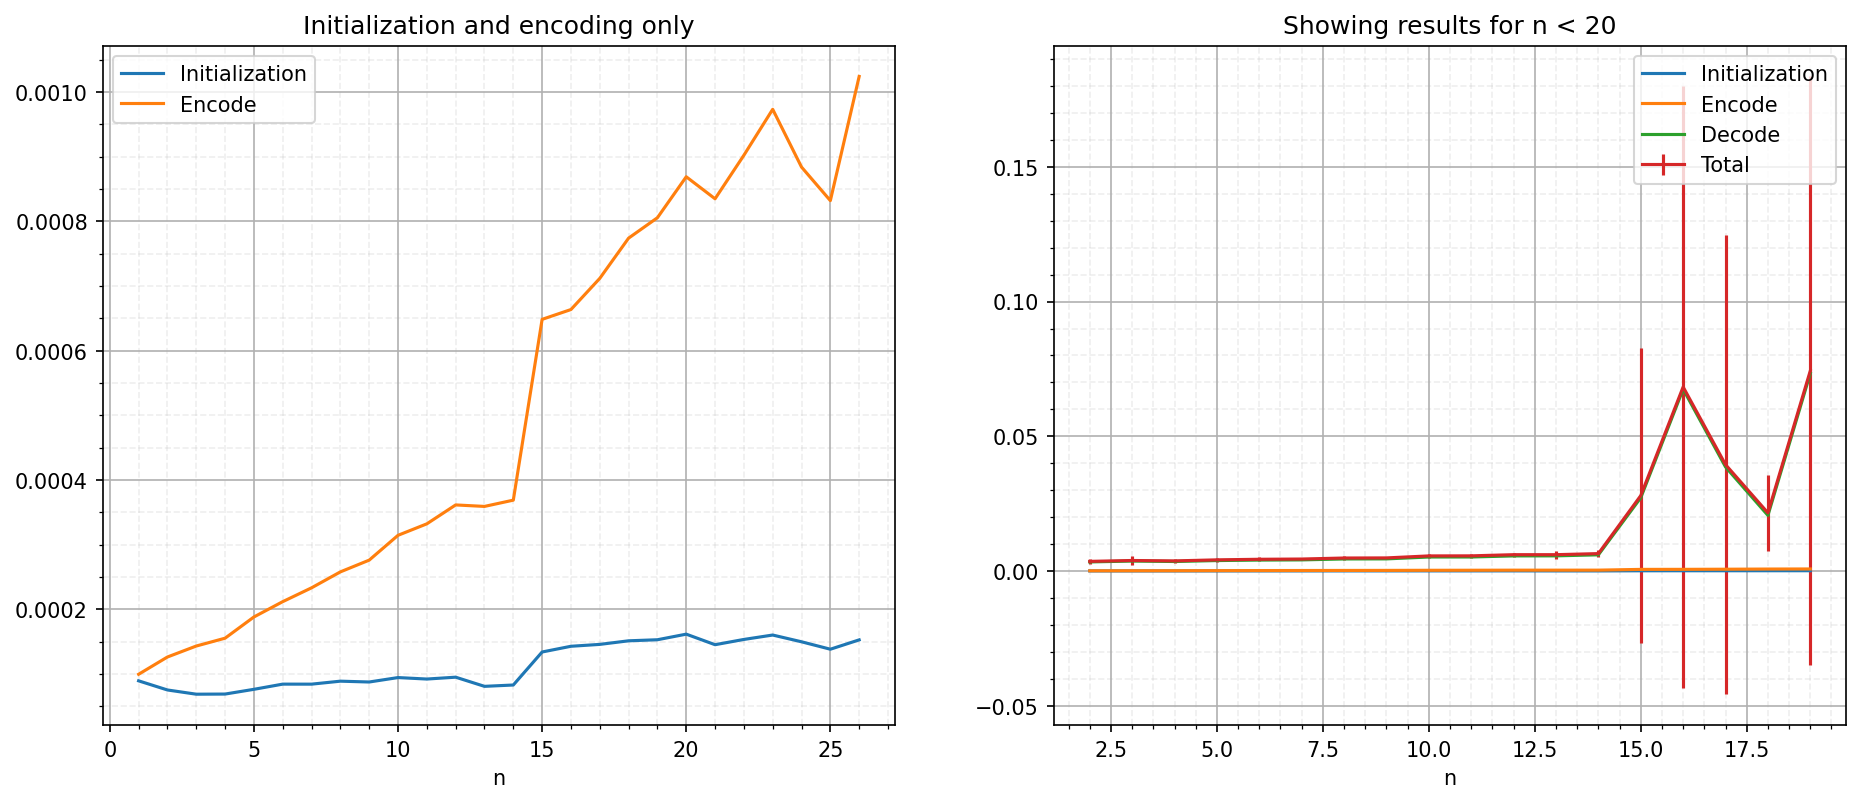

In [10]:
plot_results(df_linear, "LinearModel")

In [11]:
df_linear

,n,Initialization,Encode,Decode,Total,Total STD
0,1,0.000090,0.000100,0.003889,0.004078,0.001334
1,2,0.000076,0.000127,0.003423,0.003625,0.001053
2,3,0.000069,0.000143,0.003738,0.003951,0.001712
3,4,0.000069,0.000156,0.003575,0.003800,0.000807
4,5,0.000077,0.000188,0.003923,0.004188,0.000692
5,6,0.000085,0.000212,0.004104,0.004401,0.000668
6,7,0.000085,0.000233,0.004174,0.004492,0.000522
7,8,0.000089,0.000258,0.004520,0.004867,0.000814
8,9,0.000088,0.000276,0.004545,0.004909,0.000476
9,10,0.000095,0.000315,0.005242,0.005652,0.000867


__
## Comparison

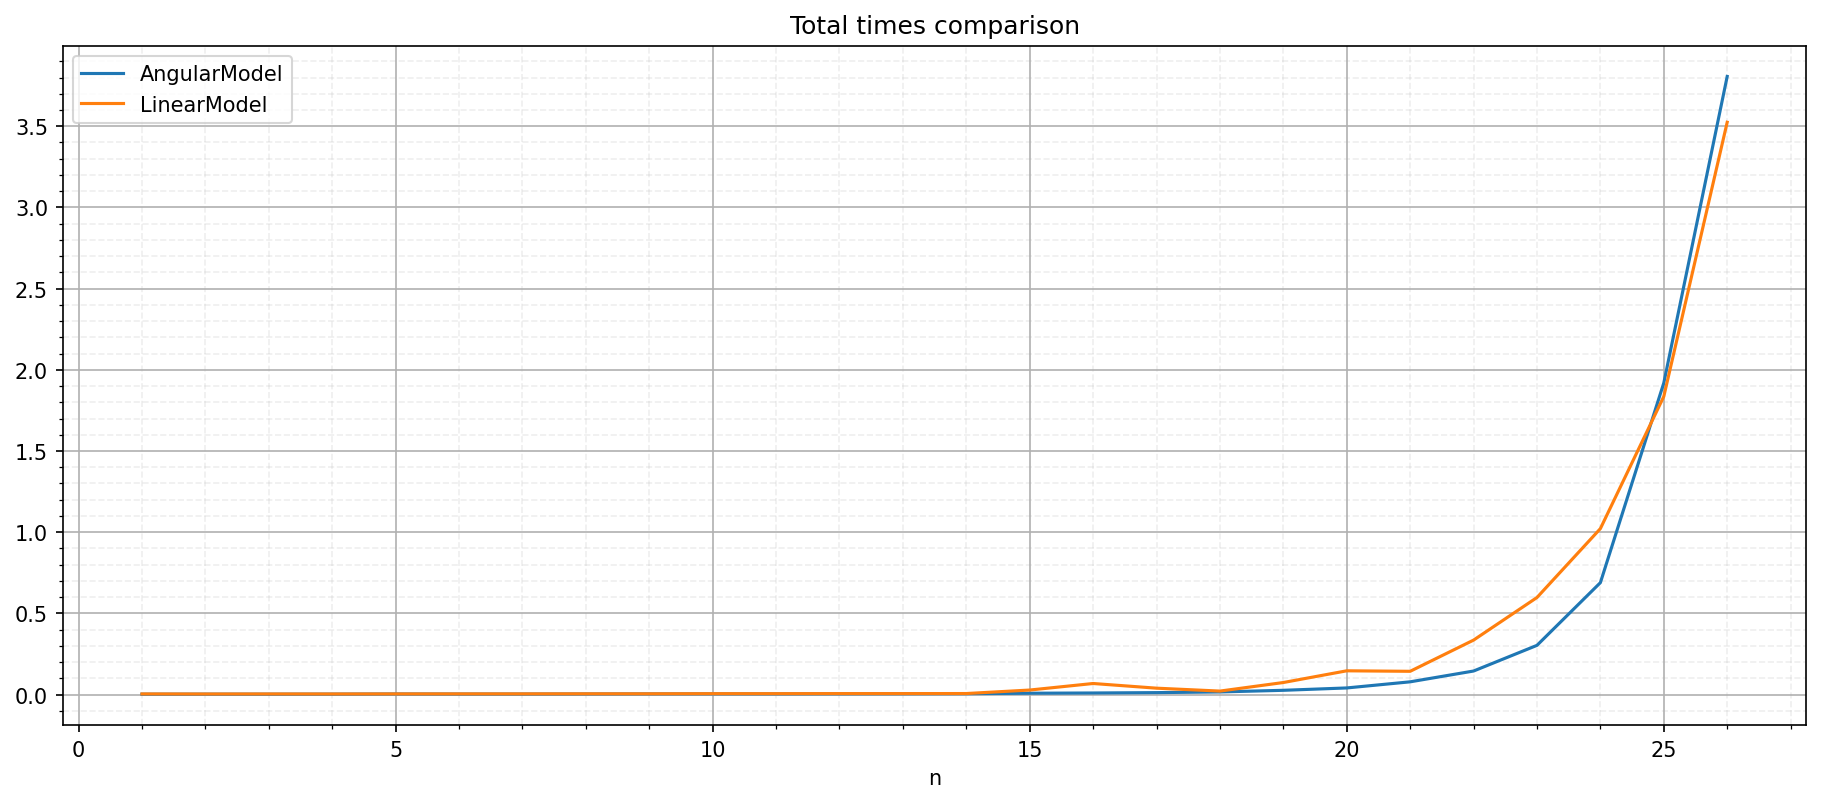

In [12]:
fig = plt.figure(figsize=(15, 6), dpi=150)

df_angular.plot(x="n", y=[4], kind="line", ax=plt.gca())
df_linear.plot(x="n", y=[4], kind="line", ax=plt.gca())
plt.legend(["AngularModel", "LinearModel"])
plt.title("Total times comparison")

plt.grid(b=True, which="major", linestyle="-")
plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
plt.minorticks_on()

plt.show()

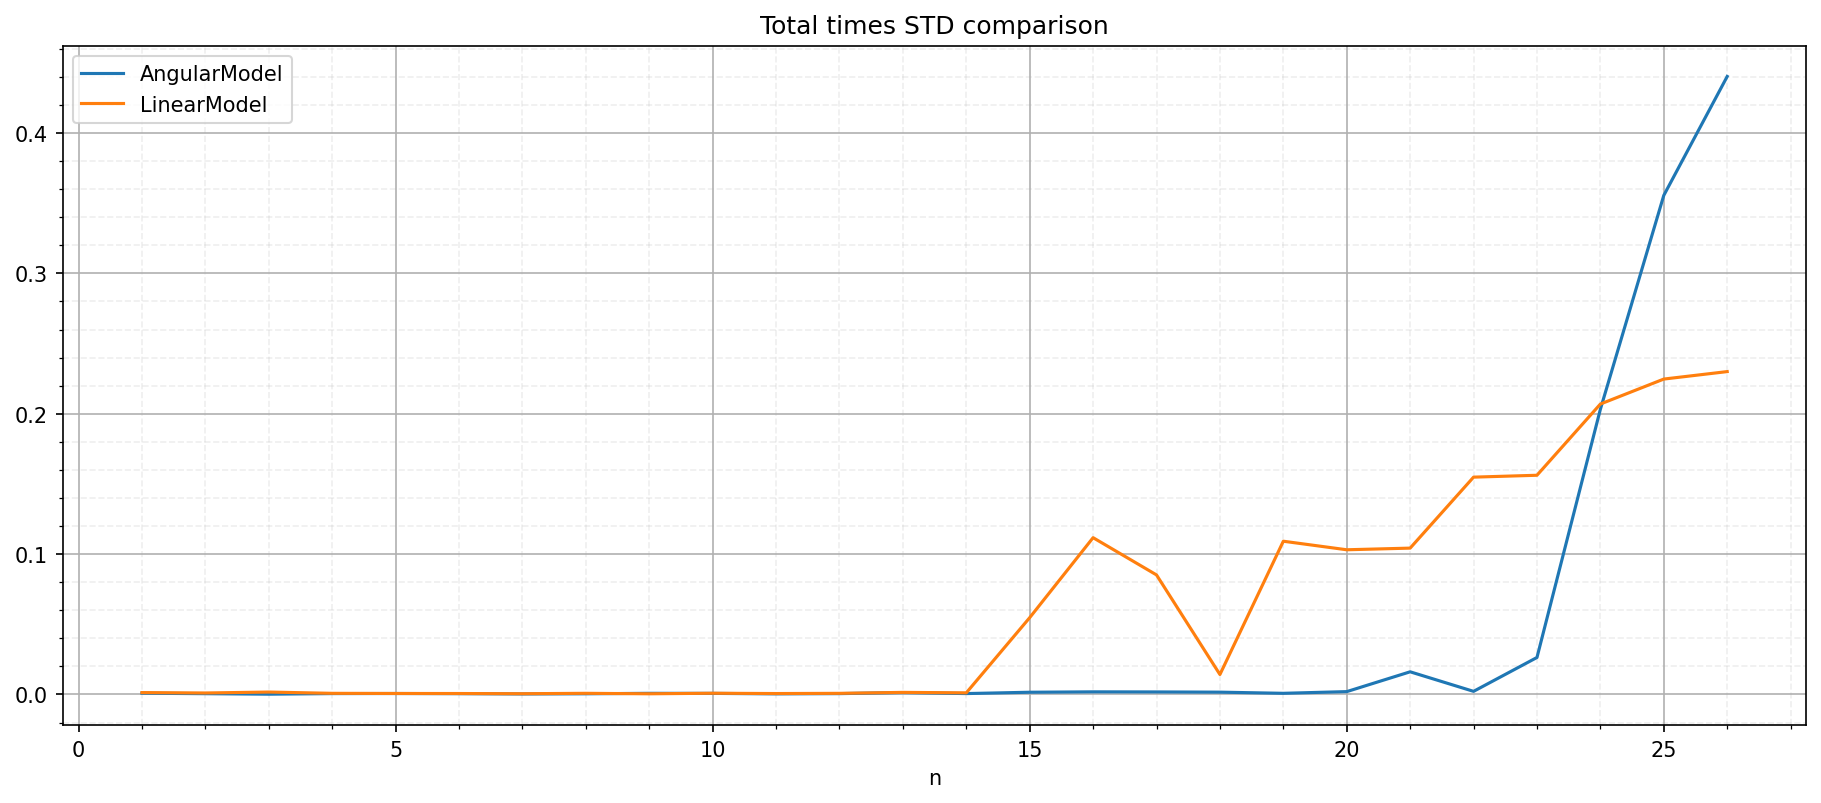

In [13]:
fig = plt.figure(figsize=(15, 6), dpi=150)

df_angular.plot(x="n", y=[5], kind="line", ax=plt.gca())
df_linear.plot(x="n", y=[5], kind="line", ax=plt.gca())

plt.legend(["AngularModel", "LinearModel"])
plt.title("Total times STD comparison")

plt.grid(b=True, which="major", linestyle="-")
plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
plt.minorticks_on()

plt.show()

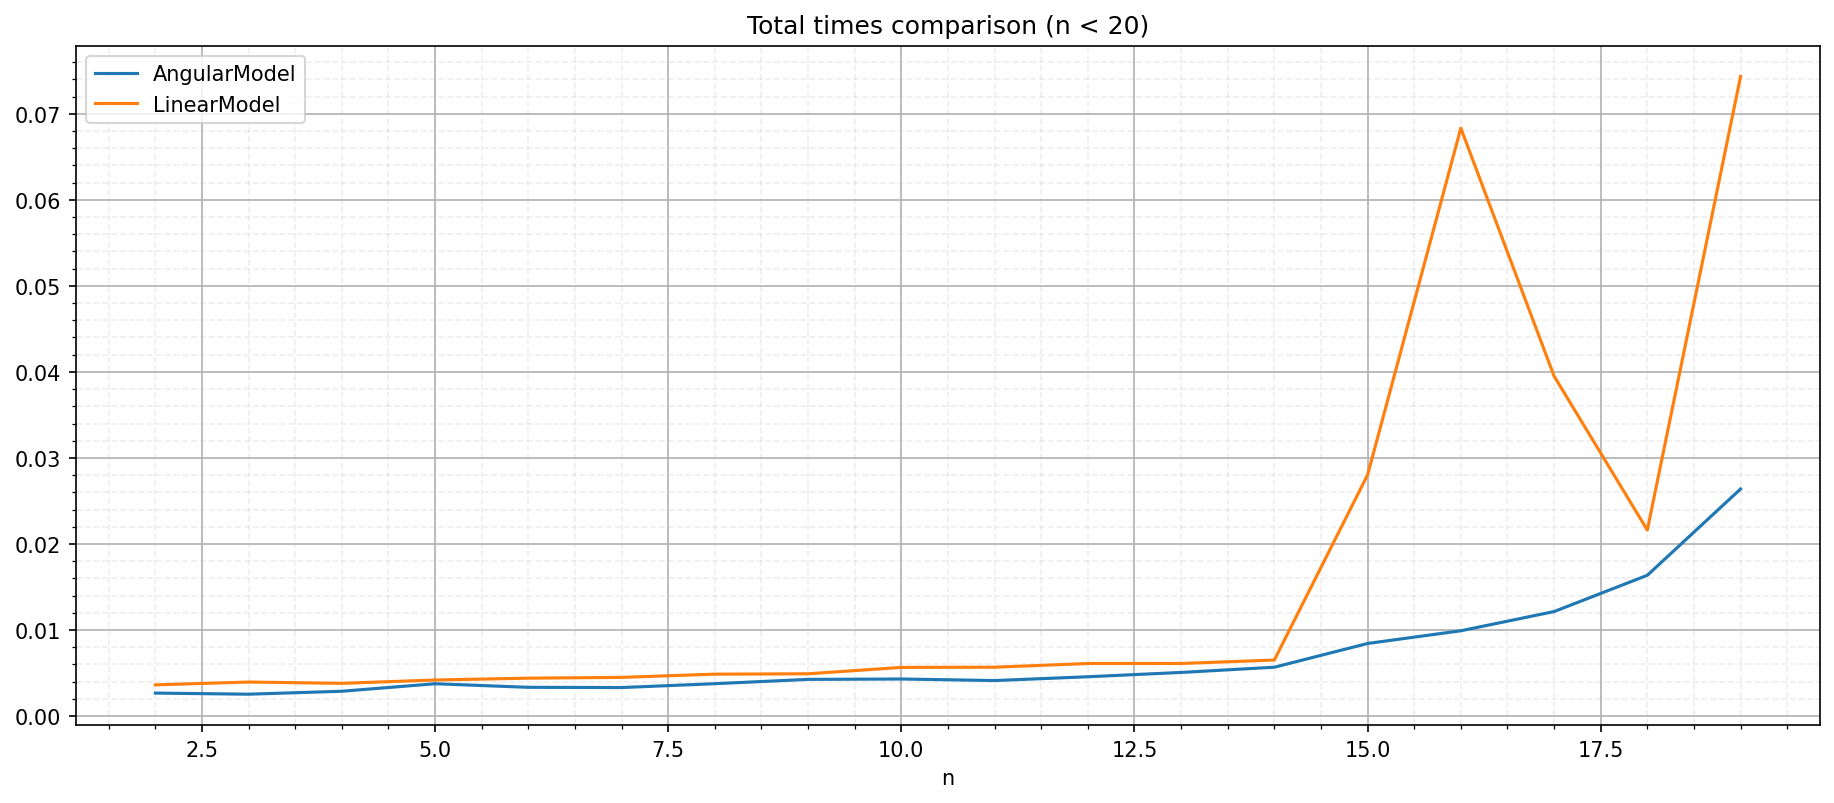

In [14]:
fig = plt.figure(figsize=(15, 6), dpi=150)

df_angular[1:19].plot(x="n", y=[4], kind="line", ax=plt.gca())
df_linear[1:19].plot(x="n", y=[4], kind="line", ax=plt.gca())

plt.legend(["AngularModel", "LinearModel"])
plt.title("Total times comparison (n < 20)")

plt.grid(b=True, which="major", linestyle="-")
plt.grid(b=True, which="minor", linestyle="--", alpha=0.2)
plt.minorticks_on()

plt.show()